In [3]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Python

## Class

In [156]:
class MyClass(object):
    def __init__(self, a, b):
        self.teacher = a
        self.student = b
    
    def func(self, ):
        '''method'''
        return self.student / self.teacher

In [157]:
c = MyClass(10, 100)
print(c.func())
print(c.teacher)

d = MyClass(5, 200)
print(c.func())
print(c.teacher)

10.0
10
10.0
10


## Numpy

In [6]:
data = np.random.rand(3, 5, 5)
print(data.shape)

(3, 5, 5)


In [7]:
dataview = data[0,:,:]
print(dataview.shape)

(5, 5)


In [8]:
dataview = data[:, :3, :2]
print(dataview.shape)

(3, 3, 2)


## Visualization

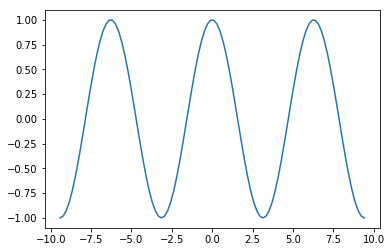

In [9]:
x = np.linspace(-3 * math.pi, 3 * math.pi, num=100)
plt.plot(x, np.cos(x))

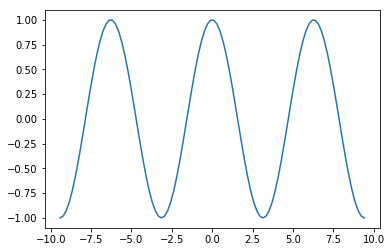

In [10]:
sns.lineplot(x=x, y=np.cos(x), )

# Pytorch

## Tensor

In [66]:

# tensor
data = torch.tensor([1, 2, 3])
print(data.shape)

# from numpy 
data = np.random.rand(10, 10)
data = torch.from_numpy(data)
data = data.numpy()

# uniform and normal
data = torch.rand(3, 5, 5)
data = torch.randn(3, 2, 4)

# to
data = data.to('cpu', torch.long)

# view
data = data.view(3, 8, -1)

print('------------------')
print('grad: ', data.grad)
print('data: ', data.data.shape)
print('------------------')
print('shape: ', data.shape)
print('size: ', data.size())
print('dtype: ', data.dtype) # dtype
print('device: ', data.device) # device
print('------------------')
print('requires_grad: ', data.requires_grad) # default to False
print('is_leaf: ', data.is_leaf) # is_leaf
print('------------------')


torch.Size([3])
------------------
grad:  None
data:  torch.Size([3, 8, 1])
------------------
shape:  torch.Size([3, 8, 1])
size:  torch.Size([3, 8, 1])
dtype:  torch.int64
device:  cpu
------------------
requires_grad:  False
is_leaf:  True
------------------


In [56]:
a = torch.rand(2, 3)
b = torch.rand(2, 3)

print(a + b)
print(torch.add(a, b))
print(a.add_(b))
print(a)

tensor([[1.0733, 0.2313, 0.4030],
        [1.2529, 1.0448, 0.5812]])
tensor([[1.0733, 0.2313, 0.4030],
        [1.2529, 1.0448, 0.5812]])
tensor([[1.0733, 0.2313, 0.4030],
        [1.2529, 1.0448, 0.5812]])
tensor([[1.0733, 0.2313, 0.4030],
        [1.2529, 1.0448, 0.5812]])


## Autograd

In [180]:
# tensor autograd related

# grad
# requires_grad
# is_leaf
# backward
# detach
# register_hook
# retain_grad

### Vector-Jacobian

In [196]:
# torch.autograd is an engine for computing vector-jacibian product

def func(x):
    return 2 * torch.pow(x, 2)

x = torch.rand(4)
J = torch.autograd.functional.jacobian(func, x)
print(J.shape)
print(J)

v = torch.ones_like(x).view(-1, 1)
print(torch.matmul(J.T, v))


torch.Size([4, 4])
tensor([[2.3302, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.6695, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.2576, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.2764]])
tensor([[2.3302],
        [0.6695],
        [1.2576],
        [0.2764]])


### Backward

In [199]:
x = torch.rand(2, 2, requires_grad=True)
# x.requires_grad_(True)
print(x)

y = func(x)
print('grad_fn: ', y.grad_fn)
print(y.requires_grad)

print(y.grad_fn.name)
print(y.grad_fn.next_functions[0][0])

tensor([[0.4608, 0.7199],
        [0.5339, 0.5955]], requires_grad=True)
grad_fn:  <MulBackward0 object at 0x7f0f1e52cfd0>
True
<built-in method name of MulBackward0 object at 0x7f0f1e52cfd0>


In [165]:
y.backward(gradient=torch.ones_like(y), retain_graph=True) # accumulate
print(x.grad)

tensor([[6.4475, 4.3014],
        [7.4442, 5.2573]])


### Function

In [184]:
# Implements forward and backward definitions of an autograd operation. 
# Every Tensor operation creats at least a single Function node \
# that connets to functions that created a Tensor and encoders its history.

In [178]:

class Exp(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x):
        r = x.exp()
        ctx.save_for_backward(r)
        return r
    
    @staticmethod
    def backward(ctx, grad_output):
        r, = ctx.saved_tensors
        return grad_output * r
    
def EXP(x):
    return Exp.apply(x)

x = torch.rand(2, 2, requires_grad=True)
y = EXP(x)
print(x, y)

y.backward(torch.ones_like(y))
print(x.grad)

tensor([[0.9610, 0.5985],
        [0.9008, 0.8983]], requires_grad=True) tensor([[2.6142, 1.8195],
        [2.4615, 2.4554]], grad_fn=<ExpBackward>)
tensor([[2.6142, 1.8195],
        [2.4615, 2.4554]])


### Tracking 

In [84]:
print(x.requires_grad)
print(x.pow(2).requires_grad)
with torch.no_grad():
    print(x.pow(2).requires_grad)

True
True
True
False


In [86]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print((x == y).all())

True
False
tensor(True)


## Module

In [193]:
# nueral network

### nn.Parameter

In [205]:
# learnable parameters / weights
# a kind of tensor, that is automatically registered as a parameter when assigned as an attibute to a Module

In [216]:
class MM(nn.Module):
    def __init__(self, ):
        super().__init__()
        self.p = nn.Parameter(torch.rand(2, 2))
        
mm = MM()

for n, p in mm.named_parameters():
    print(n)
    print(p)

p
Parameter containing:
tensor([[0.7955, 0.6957],
        [0.6948, 0.9831]], requires_grad=True)


### nn.Module

In [204]:
# neural network module. convenient way of encapsulating parameters, with helpers for moving to GPU, exporting, loading, etc.

In [219]:
class MM(nn.Module):
    def __init__(self, ):
        super().__init__()
        self.p = nn.Parameter(torch.rand(2, 2))
    
    def forward(self, x):
        pass

mm = MM()

mm.train()
mm.to('cpu')
mm.load_state_dict(mm.state_dict())

print(mm.state_dict())


OrderedDict([('p', tensor([[0.3333, 0.4285],
        [0.6797, 0.9244]]))])


## Solver

### Approximate

In [220]:
# learnable paremeters


data = 3 * math.pi * torch.rand(10000).view(-1, 1)
label = torch.cos(data)

def func(x):
    w1 = torch.rand(1, 10)
    b1 = torch.rand(10,)
    y1 = torch.matmul(x, w1) + b1

    w2 = torch.randn(10, 1)
    b2 = torch.randn(1,)
    y2 = torch.matmul(y1, w2) + b2
    
    return y2

x = torch.randn(100, 1, requires_grad=True)
y = func(x)
print(y.shape)

torch.Size([100, 1])


### Loss Function

In [202]:
# estimate how far away the output is from the target

### Optimizer

In [203]:
# optimizer, updating the weights of the network

### Example

In [187]:
model = nn.Sequential(nn.Linear(1, 64), nn.Sigmoid(), nn.Linear(64, 64), nn.Sigmoid(), nn.Linear(64, 1))
print(model)

Sequential(
  (0): Linear(in_features=1, out_features=64, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=64, out_features=1, bias=True)
)


In [188]:
for name, p in model.named_parameters():
    print(name, p.shape, p.requires_grad)

0.weight torch.Size([64, 1]) True
0.bias torch.Size([64]) True
2.weight torch.Size([64, 64]) True
2.bias torch.Size([64]) True
4.weight torch.Size([1, 64]) True
4.bias torch.Size([1]) True


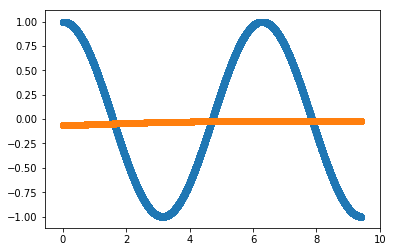

In [189]:
model.eval()
y = model(data).view(-1)
plt.scatter(data.view(-1).data.numpy(), label.data.numpy())
plt.scatter(data.view(-1).data.numpy(), y.data.numpy())
plt.show()

In [23]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.004)
criteria = nn.MSELoss()

In [24]:
bz = 128
epoches = 500

model.train()
for _ in range(epoches): # train epoches
    
    permute = np.random.permutation(data.shape[0])
    
    for i in range(0, data.shape[0]//64):
        
        idx = permute[i:i+bz]
        
        _y = model(data[idx])

        loss = criteria(_y, label[idx]) # loss = torch.pow(_y - label, 2).mean()

        optimizer.zero_grad() # w.grad == 0

        loss.backward() # w => w.grad_new => w.grad_old + w.grad_new

        optimizer.step() # w - lr * w.grad # p.data.sub_(p.grad.data * lr)


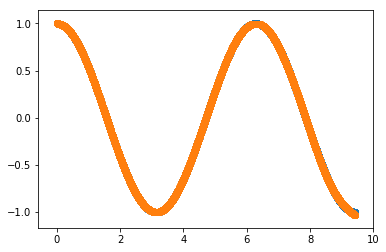

In [25]:
model.eval()

y = model(data).view(-1)
plt.scatter(data.view(-1).data.numpy(), label.data.numpy())
plt.scatter(data.view(-1).data.numpy(), y.data.numpy())

plt.show()